In [41]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [4]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [35]:
pd.set_option('display.max_colwidth', 100)

df = pd.read_csv("../curated-data/StandardPart.csv")
df.head(5)

,record_id,faculty_rank,gender,departmental_affiliation,please_write_down_the_depa,google_scholar_h_index,state_do_you_reside,how_many_months_of_your_sa,please_specify_the_months,what_is_your_current_level,...,spend_time_with_a_special,think_about_the_event_and,wish_that_i_could_change_w,go_out_fora_snack_or_meal,analyze_my_problem_before,focus_on_my_general_inadeq,phone_a_friend,email,confirm_email,standard_part_complete
0,81,Professor,Male,Computer Science,NaN,41.0,Texas,Three months,NaN,25-1%,...,2,4,4,1,3,3,1,ljohnsson12@gmail.com,ljohnsson12@gmail.com,2
1,95,Associate Professor,Male,Biology,NaN,25.0,Texas,1.5,1.5,100-75%,...,4,5,4,4,5,2,3,frankino@uh.edu,frankino@uh.edu,2
2,97,Assistant Professor,Male,Physics,NaN,17.0,Texas,Three months,NaN,100-75%,...,4,2,4,5,4,5,1,phosur@uh.edu,phosur@uh.edu,2
3,109,Professor,Male,Psychology,NaN,60.0,Texas,Three months,NaN,50-25%,...,1,5,1,1,5,1,3,spwoods@uh.edu,spwoods@uh.edu,2
4,110,Associate Professor,Female,Psychology,NaN,21.0,Texas,Three months,NaN,Not funded,...,4,4,2,4,4,1,2,jlderric@central.uh.edu,jlderric@central.uh.edu,2


In [36]:
Data = pd.DataFrame({'comments' : df['please_write_about_any_oth']})
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  167 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


In [37]:
Data = Data[Data['comments'].notna()]
Data.head()

,comments
3,"Most often, proposal deadlines are easily managed with proper planning and ongoing task monitori..."
4,There is a lot of variability in the extent to which I work up to the deadline on proposals. Two...
6,"Advance thought processes, preparation will help. However, the stress of not having money in the..."
9,Interval deadlines could work. What interval would work best is a research question in its own r...
14,"Although I have not experience it yet, I am favorable of the no deadline approach introduced by ..."


In [30]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
def remove_punc(text):
    text_notpunc = "".join([char for char in text if char not in string.punctuation])
    return text_notpunc

Data['clean_data_punc'] = Data['comments'].apply(lambda x: remove_punc(x))

Data.head()

,comments,clean_data_punc
3,"Most often, proposal deadlines are easily managed with proper planning and ongoing task monitori...",Most often proposal deadlines are easily managed with proper planning and ongoing task monitoring
4,There is a lot of variability in the extent to which I work up to the deadline on proposals. Two...,There is a lot of variability in the extent to which I work up to the deadline on proposals Two ...
6,"Advance thought processes, preparation will help. However, the stress of not having money in the...",Advance thought processes preparation will help However the stress of not having money in the ba...
9,Interval deadlines could work. What interval would work best is a research question in its own r...,Interval deadlines could work What interval would work best is a research question in its own right
14,"Although I have not experience it yet, I am favorable of the no deadline approach introduced by ...",Although I have not experience it yet I am favorable of the no deadline approach introduced by N...


In [42]:
def tokenize(text):
    token = re.split('\W+', text)
    return token
Data['clean_data_tokenize'] = Data['clean_data_punc'].apply(lambda x: tokenize(x.lower())) 
Data.head()

,comments,clean_data_punc,clean_data_tokenize
3,"Most often, proposal deadlines are easily managed with proper planning and ongoing task monitori...",Most often proposal deadlines are easily managed with proper planning and ongoing task monitoring,"[most, often, proposal, deadlines, are, easily, managed, with, proper, planning, and, ongoing, t..."
4,There is a lot of variability in the extent to which I work up to the deadline on proposals. Two...,There is a lot of variability in the extent to which I work up to the deadline on proposals Two ...,"[there, is, a, lot, of, variability, in, the, extent, to, which, i, work, up, to, the, deadline,..."
6,"Advance thought processes, preparation will help. However, the stress of not having money in the...",Advance thought processes preparation will help However the stress of not having money in the ba...,"[advance, thought, processes, preparation, will, help, however, the, stress, of, not, having, mo..."
9,Interval deadlines could work. What interval would work best is a research question in its own r...,Interval deadlines could work What interval would work best is a research question in its own right,"[interval, deadlines, could, work, what, interval, would, work, best, is, a, research, question,..."
14,"Although I have not experience it yet, I am favorable of the no deadline approach introduced by ...",Although I have not experience it yet I am favorable of the no deadline approach introduced by N...,"[although, i, have, not, experience, it, yet, i, am, favorable, of, the, no, deadline, approach,..."


In [44]:
stopword = nltk.corpus.stopwords.words('english')

In [45]:
def remove_stop_words(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

Data['clean_data_stopwords'] = Data['clean_data_tokenize'].apply(lambda x: remove_stop_words(x))

Data.head()

,comments,clean_data_punc,clean_data_tokenize,clean_data_stopwords
3,"Most often, proposal deadlines are easily managed with proper planning and ongoing task monitori...",Most often proposal deadlines are easily managed with proper planning and ongoing task monitoring,"[most, often, proposal, deadlines, are, easily, managed, with, proper, planning, and, ongoing, t...","[often, proposal, deadlines, easily, managed, proper, planning, ongoing, task, monitoring, ]"
4,There is a lot of variability in the extent to which I work up to the deadline on proposals. Two...,There is a lot of variability in the extent to which I work up to the deadline on proposals Two ...,"[there, is, a, lot, of, variability, in, the, extent, to, which, i, work, up, to, the, deadline,...","[lot, variability, extent, work, deadline, proposals, two, submitted, 15, minutes, deadline, sub..."
6,"Advance thought processes, preparation will help. However, the stress of not having money in the...",Advance thought processes preparation will help However the stress of not having money in the ba...,"[advance, thought, processes, preparation, will, help, however, the, stress, of, not, having, mo...","[advance, thought, processes, preparation, help, however, stress, money, bank, fund, lab, overwh..."
9,Interval deadlines could work. What interval would work best is a research question in its own r...,Interval deadlines could work What interval would work best is a research question in its own right,"[interval, deadlines, could, work, what, interval, would, work, best, is, a, research, question,...","[interval, deadlines, could, work, interval, would, work, best, research, question, right]"
14,"Although I have not experience it yet, I am favorable of the no deadline approach introduced by ...",Although I have not experience it yet I am favorable of the no deadline approach introduced by N...,"[although, i, have, not, experience, it, yet, i, am, favorable, of, the, no, deadline, approach,...","[although, experience, yet, favorable, deadline, approach, introduced, nsf, certain, directorate..."


In [46]:
ps = nltk.PorterStemmer()

In [47]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

Data['clean_data_stemmed'] = Data['clean_data_stopwords'].apply(lambda x: stemming(x))
Data.head()

,comments,clean_data_punc,clean_data_tokenize,clean_data_stopwords,clean_data_stemmed
3,"Most often, proposal deadlines are easily managed with proper planning and ongoing task monitori...",Most often proposal deadlines are easily managed with proper planning and ongoing task monitoring,"[most, often, proposal, deadlines, are, easily, managed, with, proper, planning, and, ongoing, t...","[often, proposal, deadlines, easily, managed, proper, planning, ongoing, task, monitoring, ]","[often, propos, deadlin, easili, manag, proper, plan, ongo, task, monitor, ]"
4,There is a lot of variability in the extent to which I work up to the deadline on proposals. Two...,There is a lot of variability in the extent to which I work up to the deadline on proposals Two ...,"[there, is, a, lot, of, variability, in, the, extent, to, which, i, work, up, to, the, deadline,...","[lot, variability, extent, work, deadline, proposals, two, submitted, 15, minutes, deadline, sub...","[lot, variabl, extent, work, deadlin, propos, two, submit, 15, minut, deadlin, submit, least, da..."
6,"Advance thought processes, preparation will help. However, the stress of not having money in the...",Advance thought processes preparation will help However the stress of not having money in the ba...,"[advance, thought, processes, preparation, will, help, however, the, stress, of, not, having, mo...","[advance, thought, processes, preparation, help, however, stress, money, bank, fund, lab, overwh...","[advanc, thought, process, prepar, help, howev, stress, money, bank, fund, lab, overwhelm, ]"
9,Interval deadlines could work. What interval would work best is a research question in its own r...,Interval deadlines could work What interval would work best is a research question in its own right,"[interval, deadlines, could, work, what, interval, would, work, best, is, a, research, question,...","[interval, deadlines, could, work, interval, would, work, best, research, question, right]","[interv, deadlin, could, work, interv, would, work, best, research, question, right]"
14,"Although I have not experience it yet, I am favorable of the no deadline approach introduced by ...",Although I have not experience it yet I am favorable of the no deadline approach introduced by N...,"[although, i, have, not, experience, it, yet, i, am, favorable, of, the, no, deadline, approach,...","[although, experience, yet, favorable, deadline, approach, introduced, nsf, certain, directorate...","[although, experi, yet, favor, deadlin, approach, introduc, nsf, certain, directoratesdivis]"


In [49]:
wn = nltk.WordNetLemmatizer()

In [50]:
def lemmatizeing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

Data['clean_data_lemmatized'] = Data['clean_data_stopwords'].apply(lambda x: lemmatizeing(x))
Data.head(10)

,comments,clean_data_punc,clean_data_tokenize,clean_data_stopwords,clean_data_stemmed,clean_data_lemmatized
3,"Most often, proposal deadlines are easily managed with proper planning and ongoing task monitori...",Most often proposal deadlines are easily managed with proper planning and ongoing task monitoring,"[most, often, proposal, deadlines, are, easily, managed, with, proper, planning, and, ongoing, t...","[often, proposal, deadlines, easily, managed, proper, planning, ongoing, task, monitoring, ]","[often, propos, deadlin, easili, manag, proper, plan, ongo, task, monitor, ]","[often, proposal, deadline, easily, managed, proper, planning, ongoing, task, monitoring, ]"
4,There is a lot of variability in the extent to which I work up to the deadline on proposals. Two...,There is a lot of variability in the extent to which I work up to the deadline on proposals Two ...,"[there, is, a, lot, of, variability, in, the, extent, to, which, i, work, up, to, the, deadline,...","[lot, variability, extent, work, deadline, proposals, two, submitted, 15, minutes, deadline, sub...","[lot, variabl, extent, work, deadlin, propos, two, submit, 15, minut, deadlin, submit, least, da...","[lot, variability, extent, work, deadline, proposal, two, submitted, 15, minute, deadline, submi..."
6,"Advance thought processes, preparation will help. However, the stress of not having money in the...",Advance thought processes preparation will help However the stress of not having money in the ba...,"[advance, thought, processes, preparation, will, help, however, the, stress, of, not, having, mo...","[advance, thought, processes, preparation, help, however, stress, money, bank, fund, lab, overwh...","[advanc, thought, process, prepar, help, howev, stress, money, bank, fund, lab, overwhelm, ]","[advance, thought, process, preparation, help, however, stress, money, bank, fund, lab, overwhel..."
9,Interval deadlines could work. What interval would work best is a research question in its own r...,Interval deadlines could work What interval would work best is a research question in its own right,"[interval, deadlines, could, work, what, interval, would, work, best, is, a, research, question,...","[interval, deadlines, could, work, interval, would, work, best, research, question, right]","[interv, deadlin, could, work, interv, would, work, best, research, question, right]","[interval, deadline, could, work, interval, would, work, best, research, question, right]"
14,"Although I have not experience it yet, I am favorable of the no deadline approach introduced by ...",Although I have not experience it yet I am favorable of the no deadline approach introduced by N...,"[although, i, have, not, experience, it, yet, i, am, favorable, of, the, no, deadline, approach,...","[although, experience, yet, favorable, deadline, approach, introduced, nsf, certain, directorate...","[although, experi, yet, favor, deadlin, approach, introduc, nsf, certain, directoratesdivis]","[although, experience, yet, favorable, deadline, approach, introduced, nsf, certain, directorate..."
15,The way the process works at my university I must arrange my schedule so I can give all of my ti...,The way the process works at my university I must arrange my schedule so I can give all of my ti...,"[the, way, the, process, works, at, my, university, i, must, arrange, my, schedule, so, i, can, ...","[way, process, works, university, must, arrange, schedule, give, time, needed, chase, glitches, ...","[way, process, work, univers, must, arrang, schedul, give, time, need, chase, glitch, rout, subm...","[way, process, work, university, must, arrange, schedule, give, time, needed, chase, glitch, rou..."
17,"My proposals are mostly to a private donor, so probably my answers are not too relevant for this...",My proposals are mostly to a private donor so probably my answers are not too relevant for this ...,"[my, proposals, are, mostly, to, a, private, donor, so, probably, my, answers, are, not, too, re...","[pro

In [59]:
def plain_text(tokenized_text):
    plain_text = ", ".join([char for char in tokenized_text])
    text_notpunc = "".join([char for char in plain_text if char not in string.punctuation])
    return text_notpunc
#     return plain_text

Data['clean_data'] = Data['clean_data_lemmatized'].apply(lambda x: plain_text(x))

Data.head()

,comments,clean_data_punc,clean_data_tokenize,clean_data_stopwords,clean_data_stemmed,clean_data_lemmatized,clean_data
3,"Most often, proposal deadlines are easily managed with proper planning and ongoing task monitori...",Most often proposal deadlines are easily managed with proper planning and ongoing task monitoring,"[most, often, proposal, deadlines, are, easily, managed, with, proper, planning, and, ongoing, t...","[often, proposal, deadlines, easily, managed, proper, planning, ongoing, task, monitoring, ]","[often, propos, deadlin, easili, manag, proper, plan, ongo, task, monitor, ]","[often, proposal, deadline, easily, managed, proper, planning, ongoing, task, monitoring, ]",often proposal deadline easily managed proper planning ongoing task monitoring
4,There is a lot of variability in the extent to which I work up to the deadline on proposals. Two...,There is a lot of variability in the extent to which I work up to the deadline on proposals Two ...,"[there, is, a, lot, of, variability, in, the, extent, to, which, i, work, up, to, the, deadline,...","[lot, variability, extent, work, deadline, proposals, two, submitted, 15, minutes, deadline, sub...","[lot, variabl, extent, work, deadlin, propos, two, submit, 15, minut, deadlin, submit, least, da...","[lot, variability, extent, work, deadline, proposal, two, submitted, 15, minute, deadline, submi...",lot variability extent work deadline proposal two submitted 15 minute deadline submit least day ...
6,"Advance thought processes, preparation will help. However, the stress of not having money in the...",Advance thought processes preparation will help However the stress of not having money in the ba...,"[advance, thought, processes, preparation, will, help, however, the, stress, of, not, having, mo...","[advance, thought, processes, preparation, help, however, stress, money, bank, fund, lab, overwh...","[advanc, thought, process, prepar, help, howev, stress, money, bank, fund, lab, overwhelm, ]","[advance, thought, process, preparation, help, however, stress, money, bank, fund, lab, overwhel...",advance thought process preparation help however stress money bank fund lab overwhelming
9,Interval deadlines could work. What interval would work best is a research question in its own r...,Interval deadlines could work What interval would work best is a research question in its own right,"[interval, deadlines, could, work, what, interval, would, work, best, is, a, research, question,...","[interval, deadlines, could, work, interval, would, work, best, research, question, right]","[interv, deadlin, could, work, interv, would, work, best, research, question, right]","[interval, deadline, could, work, interval, would, work, best, research, question, right]",interval deadline could work interval would work best research question right
14,"Although I have not experience it yet, I am favorable of the no deadline approach introduced by ...",Although I have not experience it yet I am favorable of the no deadline approach introduced by N...,"[although, i, have, not, experience, it, yet, i, am, favorable, of, the, no, deadline, approach,...","[although, experience, yet, favorable, deadline, approach, introduced, nsf, certain, directorate...","[although, experi, yet, favor, deadlin, approach, introduc, nsf, certain, directoratesdivis]","[although, experience, yet, favorable, deadline, approach, introduced, nsf, certain, directorate...",although experience yet favorable deadline approach introduced nsf certain directoratesdivisions


In [53]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


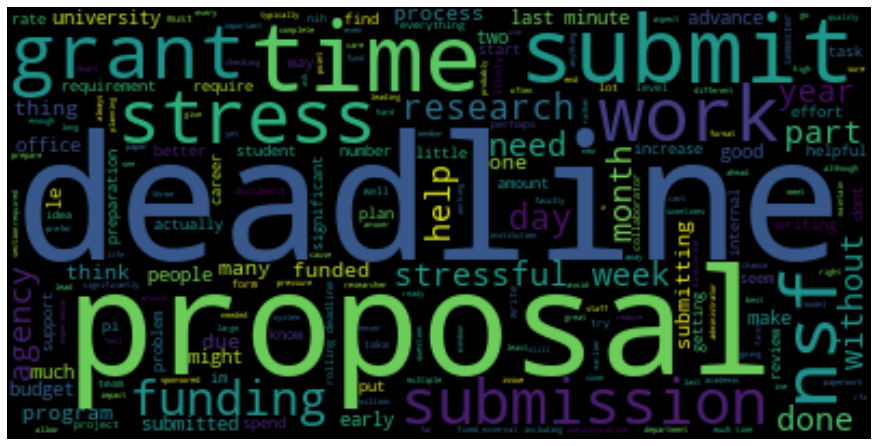

In [73]:
# text = Data['clean_data']
text = " ".join(review for review in Data['clean_data'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()